In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.util
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pathlib import Path
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Read ATom
path_obs_atom = Path('../external_data/ATom')
headers = [541, 541, 540, 540, 530, 538, 537, 518, 538, 521, 499, 457, 454, 450, 462, 461, 461, 461, 461, 458, 452, 446]

list_of_dfs = []
for i, j in zip(sorted(path_obs_atom.glob('*.ict')), headers):
    list_of_dfs.append(pd.read_csv(i, sep=',', header=j, na_values=-99999))
combo_df = pd.concat(list_of_dfs, sort=False)

In [4]:
# Read UKCA data
path_ukca_data = Path('data') # directory where all UKCA runs are stored
ukca_diag_run = 'ax631a'
path_to_ukca_files = path_ukca_data / ukca_diag_run / 'ukca_atom_overlap'# / 'ax631a.pm201607.nc'
# ds = xr.open_dataset(path_to_file)
ds = xr.open_mfdataset(path_to_ukca_files.glob('*.nc'))

In [ ]:
# UKCA diagnostic (nudged) runs variable names
# field2101 O3 MASS MIXING RATIO AFTER TIMESTEP
# field2181 OH MASS MIXING RATIO AFTER TIMESTEP
# field2182 HO2 MASS MIXING RATIO AFTER TIMESTEP

# field2102 NO MASS MIXING RATIO AFTER TIMESTEP
# field2110 CO MASS MIXING RATIO AFTER TSTEP
# field2109 CH4 MASS MIXING RATIO AFTER TSTEP
# field2114 C2H6 MASS MIXING RATIO AFTER TSTEP
# field2118 C3H8 MASS MIXING RATIO AFTER TSTEP
# field2273 n-C4H10 MASS MIXING RATIO AFTER TS
# field2274 i-C4H10 MASS MIXING RATIO AFTER TS
# field2275 n-C5H12 MASS MIXING RATIO AFTER TS
# field2276 i-C5H12 MASS MIXING RATIO AFTER TS

# field2125 MeONO2 MASS MIXING RATIO AFTER TSTEP
# field2287 n-BuONO2 MASS MIXING RATIO AFTER TS
# field2288 s-BuONO2 MASS MIXING RATIO AFTER TS
# field2289 n-2PeONO2 MASS MIXING RATIO AFTER TS
# field2290 n-3PeONO2 MASS MIXING RATIO AFTER TS
# field2291 i-PeONO2 MASS MIXING RATIO AFTER TS

# field2164 IDT1 MASS MIXING RATIO AFTER TS global 5 day
# field2165 IDT2 MASS MIXING RATIO AFTER TS global 30 day
# field2165_13 IDT19 MASS MIXING RATIO AFTER TS N America 5 day
# field2165_14 IDT20 MASS MIXING RATIO AFTER TS N America 30 day
# field2165_17 IDT23 MASS MIXING RATIO AFTER TS Europe 5 day
# field2165_18 IDT24 MASS MIXING RATIO AFTER TS Europe 30 day
# field2165_19 IDT25 MASS MIXING RATIO AFTER TS N Africa 5 day
# field2165_20 IDT26 MASS MIXING RATIO AFTER TS N Africa 30 day

In [9]:
M_air = 28.97 # dry air [kg]
h = 2000 # [m]

CO, cyclic_lons = cartopy.util.add_cyclic_point(ds.field2110.isel(hybrid_ht=0, t=0).values*(M_air/28.0101)*1e9, 
                                                coord=ds.longitude.values)
nC4H10 = cartopy.util.add_cyclic_point(ds.field2273.isel(hybrid_ht=0, t=0).values*(M_air/58.1222)*1e12)

MeONO2 = cartopy.util.add_cyclic_point(ds.field2125.isel(hybrid_ht=0, t=0).values*(M_air/77.0394)*1e12)
nBuONO2 = cartopy.util.add_cyclic_point(ds.field2287.isel(hybrid_ht=0, t=0).values*(M_air/119.1192)*1e12)
sBuONO2 = cartopy.util.add_cyclic_point(ds.field2288.isel(hybrid_ht=0, t=0).values*(M_air/119.1192)*1e12)
nPeBONO2 = cartopy.util.add_cyclic_point(ds.field2289.isel(hybrid_ht=0, t=0).values*(M_air/133.1457)*1e12) # n2PeONO2
nPeCONO2 = cartopy.util.add_cyclic_point(ds.field2290.isel(hybrid_ht=0, t=0).values*(M_air/133.1457)*1e12) # n3PeONO2
iPeBONO2 = cartopy.util.add_cyclic_point(ds.field2291.isel(hybrid_ht=0, t=0).values*(M_air/133.1457)*1e12) # iPeONO2

In [10]:
combo_df['MeONO2_WAS'][combo_df.G_ALT<h].max(), combo_df['MeONO2_WAS'].max(), MeONO2.max()

(83.62799999999999, 83.62799999999999, 52.461765)

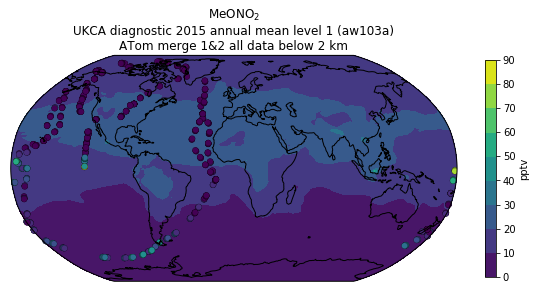

In [11]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
bounds_meono2 = np.arange(0,100,10)
norm_meono2 = colors.BoundaryNorm(boundaries=bounds_meono2, ncolors=256)
p = ax.contourf(cyclic_lons, ds.latitude, MeONO2, levels=bounds_meono2, transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<h], combo_df.G_LAT[combo_df.G_ALT<h], c=combo_df['MeONO2_WAS'][combo_df.G_ALT<h], 
                norm=norm_meono2, cmap='viridis', edgecolors='k', linewidth=0.2, transform=ccrs.PlateCarree());
ax.set_title('$MeONO_2$\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nATom merge 1&2 all data below 2 km');
fig.colorbar(p, shrink=0.4, label='pptv');
# fig.colorbar(p1, shrink=0.4, label='ppt');

In [12]:
combo_df['2-BuONO2_WAS'][combo_df.G_ALT<h].max(), combo_df['2-BuONO2_WAS'].max(), sBuONO2.max()

(53.353, 53.353, 50.87374)

In [ ]:
# plt.plot(combo_df['2-BuONO2_WAS'][:]); # ?

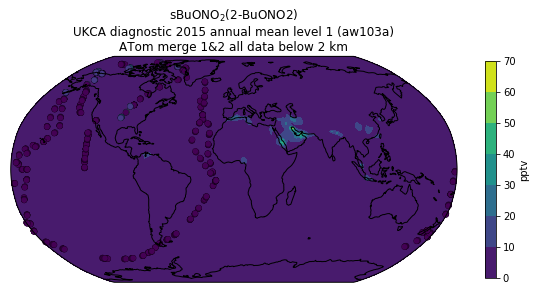

In [14]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
bounds_sbuono2 = np.arange(0,80,10)
norm_sbuono2 = colors.BoundaryNorm(boundaries=bounds_sbuono2, ncolors=256)
p = ax.contourf(cyclic_lons, ds.latitude, sBuONO2, levels=bounds_sbuono2, transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<h], combo_df.G_LAT[combo_df.G_ALT<h], c=combo_df['2-BuONO2_WAS'][combo_df.G_ALT<h], 
                norm=norm_sbuono2, cmap='viridis', edgecolors='k', linewidth=0.2, transform=ccrs.PlateCarree());
ax.set_title('$sBuONO_2 (2$-$BuONO2)$\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nATom merge 1&2 all data below 2 km');
fig.colorbar(p, shrink=0.4, label='pptv');
# fig.colorbar(p1, shrink=0.4, label='ppt'); 

In [15]:
nBuONO2.max()

2.3819196

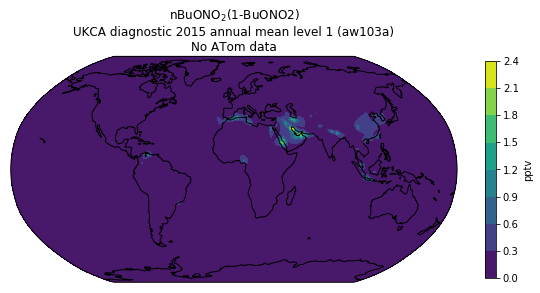

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
p = ax.contourf(cyclic_lons, ds.latitude, nBuONO2, transform=ccrs.PlateCarree());
ax.set_title('$nBuONO_2 (1$-$BuONO2)$\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nNo ATom data');
fig.colorbar(p, shrink=0.4, label='pptv');

In [17]:
combo_df['2-PenONO2_WAS'][combo_df.G_ALT<h].max(), combo_df['2-PenONO2_WAS'].max(), nPeBONO2.max()

(22.976999999999997, 22.976999999999997, 37.989914)

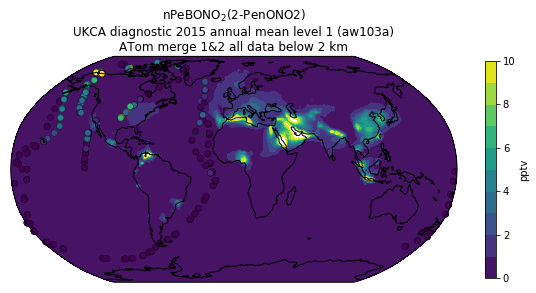

In [18]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
bounds_npebono2 = np.arange(0,11,1)
norm_npebono2 = colors.BoundaryNorm(boundaries=bounds_npebono2, ncolors=256)
p = ax.contourf(cyclic_lons, ds.latitude, nPeBONO2, levels=bounds_npebono2, transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<h], combo_df.G_LAT[combo_df.G_ALT<h], c=combo_df['2-PenONO2_WAS'][combo_df.G_ALT<h], 
                norm=norm_npebono2, cmap='viridis', edgecolors='k', linewidth=0.2, transform=ccrs.PlateCarree());
ax.set_title('$nPeBONO_2 (2$-$PenONO2)$\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nATom merge 1&2 all data below 2 km');
fig.colorbar(p, shrink=0.4, label='pptv');
# fig.colorbar(p1, shrink=0.4, label='ppt'); 

In [19]:
combo_df['3-PenONO2_WAS'][combo_df.G_ALT<h].max(), combo_df['3-PenONO2_WAS'].max(), nPeCONO2.max()

(15.755999999999998, 19.97, 27.311373)

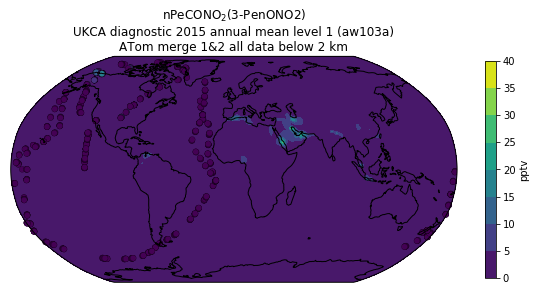

In [20]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
bounds_npecono2 = np.arange(0,45,5)
norm_npecono2 = colors.BoundaryNorm(boundaries=bounds_npecono2, ncolors=256)
p = ax.contourf(cyclic_lons, ds.latitude, nPeCONO2, levels=bounds_npecono2, transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<h], combo_df.G_LAT[combo_df.G_ALT<h], c=combo_df['3-PenONO2_WAS'][combo_df.G_ALT<h], 
                norm=norm_npecono2, cmap='viridis', edgecolors='k', linewidth=0.2, transform=ccrs.PlateCarree());
ax.set_title('$nPeCONO_2 (3$-$PenONO2)$\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nATom merge 1&2 all data below 2 km');
fig.colorbar(p, shrink=0.4, label='pptv');
# fig.colorbar(p1, shrink=0.4, label='ppt'); 

In [21]:
combo_df['3-Methyl-2-BuONO2_WAS'][combo_df.G_ALT<h].max(), combo_df['3-Methyl-2-BuONO2_WAS'].max(), iPeBONO2.max()

(14.054, 14.985999999999999, 27.000132)

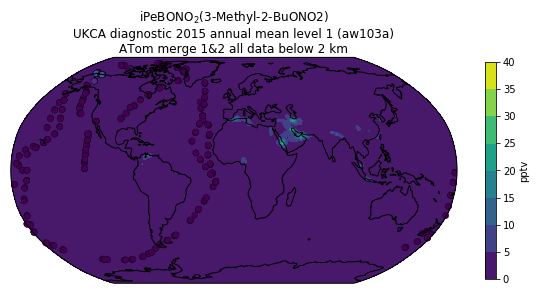

In [22]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
bounds_ipebono2 = np.arange(0,45,5)
norm_ipebono2 = colors.BoundaryNorm(boundaries=bounds_ipebono2, ncolors=256)
p = ax.contourf(cyclic_lons, ds.latitude, iPeBONO2, levels=bounds_ipebono2, transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<h], combo_df.G_LAT[combo_df.G_ALT<h], c=combo_df['3-Methyl-2-BuONO2_WAS'][combo_df.G_ALT<h], 
                norm=norm_ipebono2, cmap='viridis', edgecolors='k', linewidth=0.2, transform=ccrs.PlateCarree());
ax.set_title('$iPeBONO_2 (3$-$Methyl$-$2$-$BuONO2)$\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nATom merge 1&2 all data below 2 km');
fig.colorbar(p, shrink=0.4, label='pptv');
# fig.colorbar(p1, shrink=0.4, label='ppt'); 

In [23]:
combo_df['n-Butane_WAS'][combo_df.G_ALT<h].max(), combo_df['n-Butane_WAS'].max(), nC4H10.max()

(2410.0, 2410.0, 16609.06)

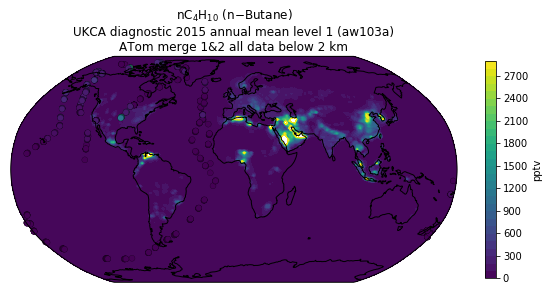

In [24]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
bounds_nc4h10 = np.arange(0,3000,100)
norm_nc4h10 = colors.BoundaryNorm(boundaries=bounds_nc4h10, ncolors=256)
p = ax.contourf(cyclic_lons, ds.latitude, nC4H10, levels=bounds_nc4h10, transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<h], combo_df.G_LAT[combo_df.G_ALT<h], c=combo_df['n-Butane_WAS'][combo_df.G_ALT<h], 
                norm=norm_nc4h10, cmap='viridis', edgecolors='k', linewidth=0.2, transform=ccrs.PlateCarree());
ax.set_title('$nC_4H_{10}$ (n$-$Butane)\nUKCA diagnostic 2015 annual mean level 1 (aw103a)\nATom merge 1&2 all data below 2 km');
fig.colorbar(p, shrink=0.4, label='pptv');
# fig.colorbar(p1, shrink=0.4, label='ppt'); 

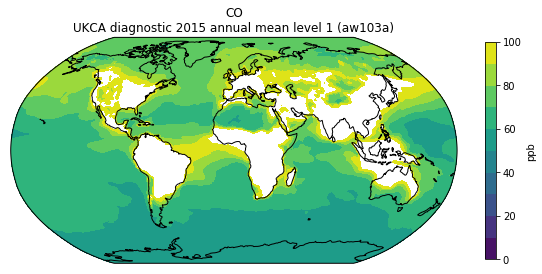

In [25]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0, globe=None)), facecolor='w')
ax.coastlines();
p = ax.contourf(cyclic_lons, ds.latitude, CO, levels=np.arange(0, 110, 10), transform=ccrs.PlateCarree());
ax.set_title('CO\nUKCA diagnostic 2015 annual mean level 1 (aw103a)');
fig.colorbar(p, shrink=0.4, label='ppb');